In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/normal-xray-test/XRAYNORMAL.jpg
/kaggle/input/random-image-xray-pneumonia/TESTXRAYPNEUMONIA.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
/


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 10px; width: 50%; margin: 0 auto;">
    <h3 style="text-align: center; color: #00796b; font-size: 24px; font-weight: bold;">How Can Artificial intelligence Improve Medical Diagnotic When It Comes to Chest X-rays ?
</h3>
    <ul style="list-style-type: none; padding: 0; text-align: center; color: #004d40; font-size: 20px; font-weight: bold; line-height: 1.8;">
    </ul>
</div>


![](https://www.j-display.com/images/product/xraysensor/img_01_sp.webp)

### Importing the packages/librairies:

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

### Context of the study :

    Introduction :
Chest X-ray exams are one of the most frequent and cost-effective medical imaging examinations available. However, clinical diagnosis of a chest X-ray can be challenging and sometimes more difficult than diagnosis via chest CT imaging. The lack of large publicly available datasets with annotations means it is still very difficult, if not impossible, to achieve clinically relevant computer-aided detection and diagnosis (CAD) in real world medical sites with chest X-rays. One major hurdle in creating large X-ray image datasets is the lack resources for labeling so many images.

- Context
Helping Deep Learning and AI Enthusiasts like me to contribute to improving COVID-19 detection using just Chest X-rays.

- Content
It is a simple directory structure branched into test and train and further branched into the respective 3 classes which contains the images.

- Acknowledgements
The University of Montreal for releasing the images.

- Inspiration
Help the medical and researcher community by sharing my work and encourage them to contribute extensively.

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 10px; width: 50%; margin: 0 auto;">
    <h3 style="text-align: center; color: #00796b; font-size: 24px; font-weight: bold;">Data Preparation and Preprocessing in Chest X-ray Diagnosis: 
</h3>
    <ul style="list-style-type: none; padding: 0; text-align: center; color: #004d40; font-size: 20px; font-weight: bold; line-height: 1.8;">
    </ul>
</div>

### Preprocessing operations :

In the context of medical image analysis, particularly for chest X-rays or other medical imaging tasks, preprocessing refers to the steps applied to the raw image data to prepare it for analysis by a machine learning or deep learning model. These steps are crucial because medical images often come with noise, irregularities, or variations that can negatively impact the model's performance if not handled properly.

In [3]:
#glob function will create a list with all the paths, os.path.basename(x) : x will take the last portion of the path which is the name of the image :

path_to_train_test = {os.path.basename(x): x for x in 
                      glob(os.path.join('..', 'input', 'covid19-image-dataset', 'Covid19-dataset', '*'))}
print(path_to_train_test)

path_to_labels = {os.path.basename(x): x for x in 
                  glob(os.path.join('..', 'input', 'covid19-image-dataset', 'Covid19-dataset', 'test', '*'))}
print(path_to_labels)

#paths of data
path_train = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
path_test = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

{'test': '../input/covid19-image-dataset/Covid19-dataset/test', 'train': '../input/covid19-image-dataset/Covid19-dataset/train'}
{'Normal': '../input/covid19-image-dataset/Covid19-dataset/test/Normal', 'Viral Pneumonia': '../input/covid19-image-dataset/Covid19-dataset/test/Viral Pneumonia', 'Covid': '../input/covid19-image-dataset/Covid19-dataset/test/Covid'}


In [4]:
#names of classes :
name_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train') #os.listdir allow us to extract all the files in the specified path
print(name_classes)

['Normal', 'Viral Pneumonia', 'Covid']


### Exploring Chest X-ray Data with Image Visualization

To visualize medical images (such as chest X-rays) in Python, the most common approach is using libraries like Matplotlib and PIL (Python Imaging Library) to load, display, and inspect images.

- First of all, we have to create an algorithm specifying that we want to access to a picture.
- Then, we've to convert this image into an array and rescaling it by dividing the matrix by 255.
- Create a plot by iterating 

/kaggle/input/covid19-image-dataset/Covid19-dataset/train
/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid
['032.jpeg', '01.jpeg', 'COVID-00014.jpg', '080.jpg', '060.jpeg', '092.png', 'COVID-00005.jpg', 'COVID-00031.jpg', '059.jpeg', '067.jpg', '044.jpeg', 'COVID-00037.jpg', '069.jpg', '089.jpg', '076.jpg', 'COVID-00032.jpg', 'COVID-00027.jpg', '058.jpeg', '050.jpeg', '03.jpeg', '02.jpeg', 'COVID-00003a.jpg', '056.jpg', '033.png', 'COVID-00016.jpg', 'COVID-00017.jpg', 'COVID-00022.jpg', '09.png', '088.jpeg', '068.jpg', 'COVID-00034.jpg', '064.jpg', 'COVID-00029.jpg', '015.jpg', 'COVID-00030.jpg', '054.jpeg', '086.jpg', '052.jpeg', 'COVID-00007.jpg', 'COVID-00025.jpg', '084.jpeg', '079.jpeg', '042.jpeg', 'COVID-00038.jpg', 'COVID-00003b.jpg', '041.jpeg', 'COVID-00026.jpg', '057.jpeg', '021.jpeg', 'COVID-00001.jpg', '027.jpeg', '046.jpeg', 'COVID-00028.jpg', '039.jpeg', '071.jpg', '08.jpeg', 'COVID-00009.jpg', '062.jpeg', 'COVID-00024.jpg', '045.jpeg', 'COVID-00018.jpg', '

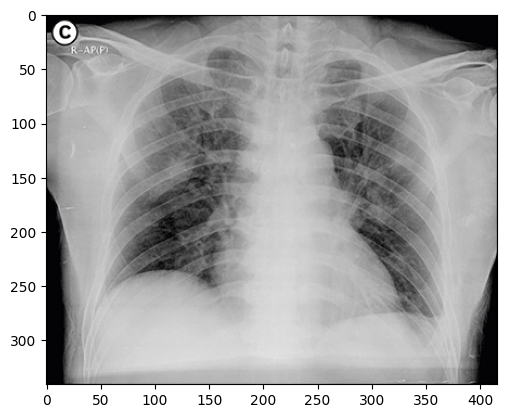

In [5]:
# Example for Covid X-rays:
print(path_train) # Path to train
image_path = path_train + '/' + 'Covid' # Acces to one of the classes, here we chose : 'Covid'
print(image_path) # Path to Covid
image_in_folder = os.listdir(image_path) # Using os.listdir to extract all the elements located in 'Covid'
print(image_in_folder) # Print contents inside 'Covid'
first_image = image_in_folder[0]
print('First Image :', first_image) #Choose an image
first_image_path = image_path + '/' + first_image
print(first_image_path)

img_input = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0120.jpg' #insert image path
img = image.load_img(img_input)
plt.imshow(img)

In [6]:
#function to show one image each class
def plot_image(name_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(name_classes):
        image_path = path_train + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

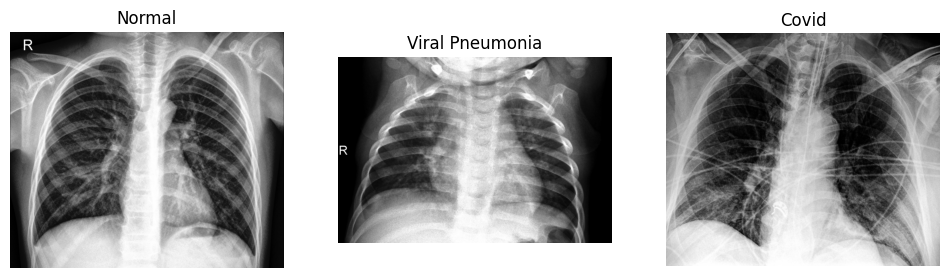

In [7]:
plot_image(name_classes)

In [8]:
directory_train_for_Covid = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'train', 'Covid', '*' ))}
directory_train_for_Normal = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'train', 'Normal', '*' ))}
directory_train_for_VP = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'train', 'Viral Pneumonia', '*' ))}

print(' \n Number of images for Covid : {} \n Number of images for Normal : {} \n Number of images for Viral Pneumonia : {}'
          .format(len(directory_train_for_Covid), len(directory_train_for_Normal), len(directory_train_for_VP)))
total_train_images = len(directory_train_for_Covid) + len(directory_train_for_Normal) + len(directory_train_for_VP)
print('Total Images for Train :', total_train_images)

 
 Number of images for Covid : 111 
 Number of images for Normal : 70 
 Number of images for Viral Pneumonia : 70
Total Images for Train : 251


In [9]:
directory_test_for_Covid = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'test', 'Covid', '*' ))}
directory_test_for_Normal = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'test', 'Normal', '*' ))}
directory_test_for_VP = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'test', 'Viral Pneumonia', '*' ))}

print(' \n Number of images for Covid : {} \n Number of images for Normal : {} \n Number of images for Viral Pneumonia : {}'
          .format(len(directory_test_for_Covid), len(directory_test_for_Normal), len(directory_test_for_VP)))
total_test_images = len(directory_test_for_Covid) + len(directory_test_for_Normal) + len(directory_test_for_VP)
print('Total Images for Test :', total_test_images)

 
 Number of images for Covid : 26 
 Number of images for Normal : 20 
 Number of images for Viral Pneumonia : 20
Total Images for Test : 66


In [10]:
print('Total Images :', (total_train_images+total_test_images))

Total Images : 317


### ImagDataGenerator :

The ImageDataGenerator class in Keras (part of TensorFlow) is a powerful utility for image preprocessing and augmentation. It allows you to load images in batches, apply transformations like resizing, rescaling, rotation, flipping, etc., and feed them into a model for training.

In [11]:
data_generator = ImageDataGenerator(rescale = 1/255)

In [12]:
#train data generator
train_data = data_generator.flow_from_directory(path_train,
                                                target_size = (224, 224),
                                                batch_size = 16
                                               )

Found 251 images belonging to 3 classes.


In [13]:
#test data generator
test_data = data_generator.flow_from_directory(path_test,
                                                target_size = (224, 224),
                                                batch_size = 1
                                               )

Found 66 images belonging to 3 classes.


This should be the path to your training data directory. The directory should contain subdirectories (each representing a class) where the images are stored. 
flow_from_directory() will automatically assign labels to images based on the folder structure (e.g., 'pneumonia' could be class 0, and 'normal' could be class 1).

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 10px; width: 50%; margin: 0 auto;">
    <h3 style="text-align: center; color: #00796b; font-size: 24px; font-weight: bold;">Convolution Neural Network with Keras
</h3>
    <ul style="list-style-type: none; padding: 0; text-align: center; color: #004d40; font-size: 20px; font-weight: bold; line-height: 1.8;">
    </ul>
</div>

![](https://miro.medium.com/v2/resize:fit:1200/1*18A5bLKeQKCRuOIT17pT8A.png)

A Convolutional Neural Network (CNN) is a type of deep learning model that is particularly effective for analyzing visual data, such as images and videos. CNNs have been widely used in various applications, including image classification, object detection, medical image analysis, and more.

Let's go through the key concepts behind CNNs and how they work, and then look at how to implement a CNN in Python using Keras/TensorFlow.

What is a Convolutional Neural Network (CNN)?
CNNs are a specialized class of neural networks that process data in grid-like structures, such as images. They are designed to automatically and adaptively learn spatial hierarchies of features from input images.

Basic Components of a CNN:
- Convolutional Layer:

The core building block of a CNN is the convolutional layer, which applies a set of filters (kernels) to the input image to extract features like edges, textures, and patterns.
These filters slide across the input image (hence the term convolution) and produce feature maps that highlight important visual elements of the image.
The operation is called convolution, where the filter is applied to small regions of the image (referred to as the receptive field).

- Activation Function (typically ReLU):

After applying the convolution, the results go through a non-linear activation function such as ReLU (Rectified Linear Unit) to introduce non-linearity and help the network learn complex patterns.
ReLU works by replacing all negative values in the feature map with zero, allowing the network to learn non-linear representations.

- Pooling Layer (Max Pooling):

After the convolutional layer, a pooling layer is typically applied to reduce the spatial dimensions of the feature map, thereby reducing the computational complexity and the number of parameters in the network.
Max pooling is the most common type of pooling, where a sliding window extracts the maximum value from small regions of the image, keeping the most important information.

- Fully Connected (Dense) Layers:

After several convolutional and pooling layers, the high-level features are passed through one or more fully connected layers (dense layers).
These layers are similar to traditional neural networks and are used to make predictions or classifications based on the learned features.
Output Layer:

The final layer of a CNN is usually a softmax or sigmoid layer, depending on the type of problem (classification, binary classification, etc.).

### CNN Keras/Tensorflow Librairies/Packages :

In [14]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

You can call the next() function on the train_data generator to get a batch of images. This will return two objects:

- Images: A batch of images in the form of a NumPy array.
- Labels: The corresponding labels for the batch of images.

Found 251 images belonging to 3 classes.
Dimension of the Image: (28, 28)


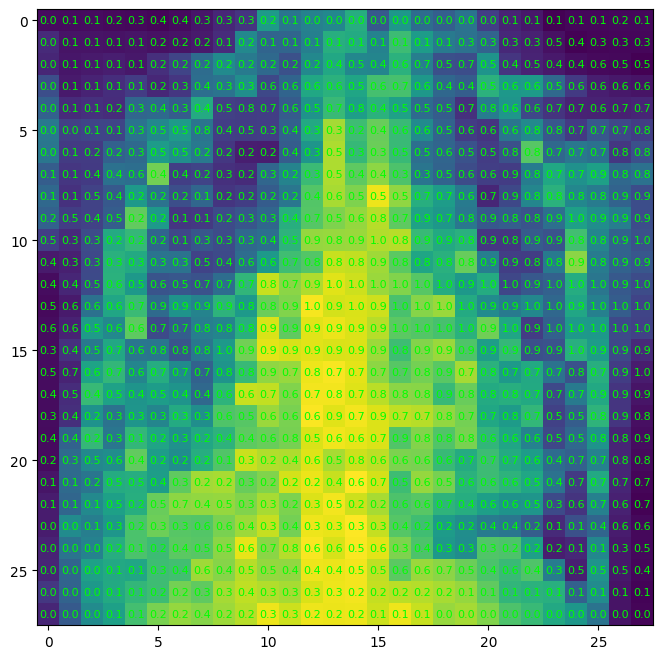

In [15]:
def GetPixels(train_test_data):

    #train data generator
    train_data_example = data_generator.flow_from_directory(path_train,
                                                target_size = (28, 28),
                                                batch_size = 16
                                                   )
    random_image_selected = np.random.randint(0,11)
    images, labels = next(train_data_example) # Get a batch of images and labels
    COLOR2GRAY = np.mean(images[random_image_selected], axis=-1)
    
    plt.figure(figsize=(15,8))
    plt.imshow(COLOR2GRAY)
    print('Dimension of the Image:', str(COLOR2GRAY.shape))
    
    for i in range(28):
        for j in range(28):
            plt.text(i, j, round(COLOR2GRAY[i,j],1),fontsize=8, color='lime', ha='center', va='center')
            
    plt.show()

GetPixels(train_data)

### Mathematics behind CNN :

Let's assume we have the following images for the dog and the cat:

- Normal Image: A $5x5$ pixel image with values ranging from 0 to 255 (grayscale).
- Covid Image: A similar $5x5$ pixel image with values ranging from 0 to 255 (grayscale).

Both images are of shape :

$I_{\text{Normal}} = \begin{bmatrix}
255 & 200 & 100 & 50 & 10 \\
200 & 150 & 120 & 70 & 30 \\
100 & 80  & 50  & 30 & 10 \\
50  & 30  & 20  & 10 & 5  \\
10  & 5   & 3   & 2  & 1  \\
\end{bmatrix}$ et 
$I_{\text{Covid}} = \begin{bmatrix}
10  & 50  & 100 & 150 & 200 \\
15  & 60  & 110 & 160 & 210 \\
25  & 70  & 120 & 170 & 220 \\
30  & 80  & 130 & 180 & 230 \\
40  & 90  & 140 & 190 & 240 \\
\end{bmatrix}$

In a convolution layer, the goal is to apply a filter (also called a kernel) to extract features from the input image. Let's define a filter:

$W_1 = \begin{bmatrix}
1  & 0  & -1  \\
1  & 0  & -1  \\
1  & 0  & -1  \\
\end{bmatrix}$

The filter slides over the image to perform a convolution operation. The convolution operation is calculated as follows:

$S_{\text{out}}(i,j) = \left( I_{\text{input}} * W_1 \right)(i,j) = \sum_{m=1}^{3} \sum_{n=1}^{3} I_{\text{input}}(i+m-1, j+n-1) \cdot W_1(m,n)$

This means you take a patch of the image (of the same size as the filter), multiply corresponding values with the filter, and then sum them up.

For simplicity, let's assume we apply the filter on a region of size $3x3$ from the $I_{Normal}$ image at the region $(1,1)$:

$\begin{bmatrix}
285  & 180  & 100  \\
220  & 150  & 130  \\
80  & 60  & 40  \\
\end{bmatrix}$


$
S_{\text{out}}(1,1) = (255 \cdot 1) + (200 \cdot 0) + (100 \cdot -1) + (200 \cdot 1) + (150 \cdot 0) + (120 \cdot -1) + (100 \cdot 1) + (80 \cdot 0) + (50 \cdot -1) = 285
$

This is the result of applying the filter at position $(1,1)$. We repeat this operation for each possible position of the filter over the entire image.

After convolution, we apply an activation function, commonly ReLU (Rectified Linear Unit), to introduce non-linearity into the model. ReLU works as follows:
$ReLU(x) = max(0,x)$ If the output of the convolution had been negative, ReLU would have set it to zero. ReLU is applied element-wise to the entire convolution output.

To reduce the spatial dimensions of the feature map and make the model more invariant to small translations, we apply a pooling operation. Max pooling is commonly used. Let's apply $2×2$ max pooling with a stride of 2:

$ \begin{bmatrix}
285  & 180  & 100  \\
220  & 150  & 130  \\
80  & 60  & 40  \\
\end{bmatrix}$

After max pooling, we take the maximum value from each $2×2$ window:

$Max_Pooling_Output =\begin{bmatrix}
285  & 180  \\
220  & 150  \\
\end{bmatrix}$

After pooling, we flatten the 2D feature map into a 1D vector, which will be used as input to a fully connected layer (dense layer). Suppose the pooled output is 

$Flattened  =\begin{bmatrix}
285  & 180 & 220  & 150 \\
\end{bmatrix}$

The flattened output is passed through a fully connected (dense) layer. In this layer, each input node is connected to each output node. Suppose we have 4 nodes in the flattened output and 2 output nodes (for dog or cat classification). We define the weights and bias for the fully connected layer:

Let $𝑊_2$ be the weight matrix for the fully connected layer size $4x2$ and $b_2$ be the bias vector for the fully connected layer size $1×2$:

$W_2 =\begin{bmatrix}
0.2  & 0.5  \\
0.1  & 0.3  \\
0.4  & 0.7  \\
0.6  & 0.2  \\
\end{bmatrix}$ and
$b_2 =\begin{bmatrix}
0.1  & -0.1  \\
\end{bmatrix}$

Compute the output as follows : 
$z_{Normal} = ( X_{flattened}^{Normal} * W_2) + b_2 = \begin{bmatrix}
285  & 180 & 220  & 150 \\
\end{bmatrix} * \begin{bmatrix}
0.2  & 0.5  \\
0.1  & 0.3  \\
0.4  & 0.7  \\
0.6  & 0.2  \\
\end{bmatrix} + \begin{bmatrix}
0.1  & -0.1  \\
\end{bmatrix} = 3.2 $

And let's say that for Covid, $z_{Covid} = 2.5$
So, basically we have $Z = [z_{Normal} ; z_{Covid}]$ with $Z = [3.2 ; 2.5]$

The Softmax function is a commonly used activation function in machine learning, especially in classification problems. It is particularly useful when you want to assign probabilities to multiple classes (e.g., in multi-class classification problems). In a classification problem, Softmax converts raw logits (unscaled scores) into probabilities. Each class gets a probability, and the class with the highest probability is usually chosen as the predicted class.

Softmax Function (General Formula)
Given a vector of raw scores (logits), the softmax function transforms them into probabilities. The softmax function is defined as:

$\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}$

$\text{Softmax}(z_{Normal}) = 0.69$ and $\text{Softmax}(z_{Covid}) = 0.33$

Here, the Softmax output for the "Normal" class is 0.69. This means that, based on the model's computations, the probability that the input belongs to the Normal class (e.g., no illness, no COVID-19) is 69%.

In [16]:
#Medical Intelligence Assistance For Chest X-Ray Diagnostic (MAICXD):
model = tf.keras.models.Sequential(name='MAICXDNet', 
                layers= [
                        #Layer 1:
                        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='valid', data_format=None, 
                                              activation = 'relu', input_shape=(224,224,3)),
                        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=None),
                        
                            #Layer 2:
                            tf.keras.layers.Conv2D(filters=68, kernel_size=(3,3), padding='valid', data_format=None, 
                                              activation = 'relu'),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=None),

                                #Flattened Layer:
                                tf.keras.layers.Flatten(),

                                    #Dense Layer (Fully-Connected):
                                    tf.keras.layers.Dense(units=3, activation='softmax')
                    ])

model.summary()

Model: "MAICXDNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 68)        │          19,652 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 68)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 198288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │         594,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 615,415 (2.35 MB)

 Trainable params: 615,415 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

- optimizer='adam': This tells the model how to adjust itself to get better at predicting.
- loss='categorical_crossentropy': This is a measure of how wrong the model’s predictions are. The goal is to make this number as small as possible.
- metrics=['accuracy']: We’ll track how accurate the model is during training.

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model_fit = model.fit(train_data, epochs=3, validation_data=test_data, callbacks=None)

Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 895ms/step - accuracy: 0.4442 - loss: 2.3612 - val_accuracy: 0.7576 - val_loss: 0.7266
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 838ms/step - accuracy: 0.8822 - loss: 0.3672 - val_accuracy: 0.8636 - val_loss: 0.3077
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 784ms/step - accuracy: 0.9620 - loss: 0.1510 - val_accuracy: 0.7879 - val_loss: 0.5163


In [19]:
loss, accuracy = model.evaluate(test_data)
print('Loss : {:.2f}, Accuracy: {:.2f}'.format(loss, accuracy))

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7874 - loss: 0.6369
Loss : 0.52, Accuracy: 0.79


<Figure size 1000x800 with 0 Axes>

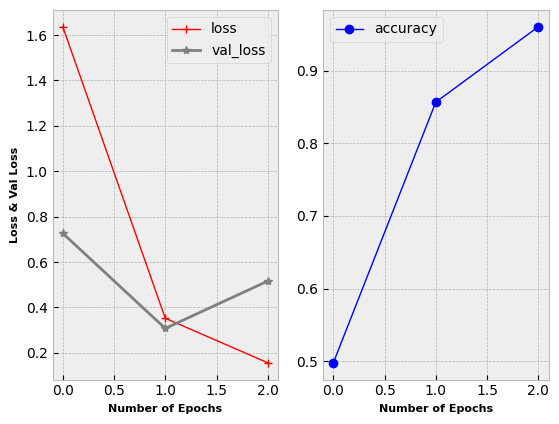

In [20]:
#Performance (History):
plt.figure(figsize=(10,8))
plt.style.use('bmh')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False)

#Loss & Validation Loss:
ax1.plot(model_fit.history['loss'], label='loss', color='red', marker='+', lw=1)
ax1.plot(model_fit.history['val_loss'], label='val_loss', color='grey', marker='*')
ax1.set_xlabel('Number of Epochs', fontsize=8, fontweight='bold')
ax1.set_ylabel('Loss & Val Loss', fontsize=8, fontweight='bold')
ax1.legend()
#Accuracy:
ax2.plot(model_fit.history['accuracy'], label='accuracy', color='blue', marker='o', lw=1)
ax2.set_xlabel('Number of Epochs', fontsize=8, fontweight='bold')
ax2.legend()

- When val_loss is lower than loss: This indicates that your model is able to adapt well not only to the training data but also to the validation data, which is a good sign of generalization.

- When val_loss is higher than loss: This can indicate that your model is overfitting. It means that the model learns very well on the training data, but does not generalize well to new, unseen data (such as the validation data).

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 10px; width: 50%; margin: 0 auto;">
    <h3 style="text-align: center; color: #00796b; font-size: 24px; font-weight: bold;">Prediction : Automated Disease Detection from Chest X-rays
</h3>
    <ul style="list-style-type: none; padding: 0; text-align: center; color: #004d40; font-size: 20px; font-weight: bold; line-height: 1.8;">
    </ul>
</div>

![](https://www.prime-health.co.uk/static/2795d92b3174e32c9a12d0ec05d8d012/204db/x-ray.jpg)


### Prediction :

Chest X-rays are one of the most widely used imaging techniques in medical diagnostics, providing valuable insights into lung conditions and other thoracic abnormalities. With advancements in artificial intelligence (AI) and deep learning, particularly Convolutional Neural Networks (CNNs), there is significant potential to automate and enhance the accuracy of disease detection from X-ray images. This section explores the application of deep learning models to predict and classify pulmonary diseases, such as pneumonia, tuberculosis, and COVID-19, directly from chest X-ray images. By leveraging large datasets and sophisticated algorithms, AI-driven systems are helping to improve diagnostic speed, reliability, and accessibility, especially in resource-limited settings.

### Application :
When you upload a chest X-ray image to the trained model, it can predict the possible condition or disease based on the patterns it has learned from a large dataset of labeled X-ray images. The model analyzes the image and provides a prediction, such as "Pneumonia," "COVID-19," or "Normal," along with the probability of each class. This process is automated, and the model uses features like lung opacity, shadows, and other patterns to classify the image. The model's output helps doctors make faster and more accurate diagnoses.

In [21]:
train_data.class_indices.items()

dict_items([('Covid', 0), ('Normal', 1), ('Viral Pneumonia', 2)])

The `class_indices.items()` method in Keras returns the class labels and their corresponding indices from the `class_indices` dictionary of a data generator like `ImageDataGenerator`. The `class_indices` dictionary maps class names (e.g., 'cats', 'dogs') to numerical indices (e.g., 0, 1). Using `.items()` allows you to iterate over these pairs, providing both the class name and its index. This is useful for understanding the mapping between class labels and their respective numerical values during training or evaluation.

In [22]:
print(train_data.class_indices.items())
class_dict = dict([value, key] for key, value in train_data.class_indices.items())
class_dict

dict_items([('Covid', 0), ('Normal', 1), ('Viral Pneumonia', 2)])


{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [23]:
from tensorflow.keras.preprocessing import image

def prediction(Drop_XRAY_Here, actual_label, model, class_dict):
    """
    Function to make prediction on X-Ray image and display the result with the probability.
    
    Args:
    Drop_XRAY_Here (str): Path to the X-Ray image to be predicted.
    actual_label (str): Actual label of the image (used for comparison).
    model (keras.Model): The trained CNN model used for prediction.
    class_dict (dict): Dictionary mapping class indices to class labels.
    """
    # Charger et prétraiter l'image
    testing_img = image.load_img(Drop_XRAY_Here, target_size=(224, 224))  #Load the image
    test_img_array = image.img_to_array(testing_img) / 255  #Normalization
    
    #Reshape : (batch_size, height, width, channels))
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                           test_img_array.shape[1],
                                           test_img_array.shape[2])
    
    #Prediction :
    prediction_array = model.predict(test_img_input)
    
    #Predict the class and the associated probability :
    predicted_class = np.argmax(prediction_array)  #Predicted Class
    predicted_img = class_dict[predicted_class]  
    predicted_prob = float(prediction_array[0][predicted_class] * 100)  #Probability of the Class in percentage
    
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_array)
    plt.title('Actual Label: {}, Predicted Label: {}\nProbability: {:.2f}%'.format(actual_label, predicted_img, predicted_prob), 
             fontsize=10)
    
    plt.grid(False)  # No Grid
    plt.axis('off')  # No Axes
    plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 10px; width: 50%; margin: 0 auto;">
    <h3 style="text-align: center; color: #00796b; font-size: 24px; font-weight: bold;">Result: CNN Model Predicts Disease from Patient Scan
</h3>
    <ul style="list-style-type: none; padding: 0; text-align: center; color: #004d40; font-size: 20px; font-weight: bold; line-height: 1.8;">
    </ul>
</div>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


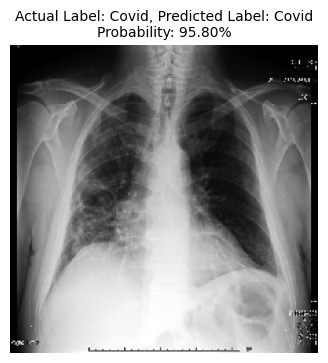

In [24]:
Drop_XRAY_Here = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0115.jpeg'  #Image Path
prediction(Drop_XRAY_Here, 
           actual_label='Covid', 
           model=model, 
           class_dict=class_dict
          ) # Predictor Function

    Conclusion :
#### > **We performed a scan on a COVID-positive patient and input the data into a CNN model. The model predicted that the patient has COVID-19 based on the scan, confirming the diagnosis.**